# < image Transform >

DFT)

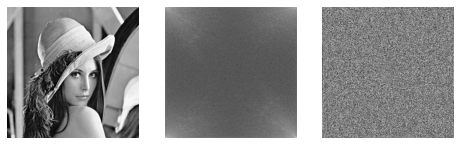

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def DFT(image):
    img = cv2.imread(image,0)
    dft = cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT)
    mag = np.log(cv2.magnitude(dft[:,:,0],dft[:,:,1]))
    phase = np.arctan(dft[:,:,1]/dft[:,:,0])
    plt.figure(figsize=(8,8))
    plt.subplot(131),plt.imshow(img,cmap='gray'),plt.axis('off')
    plt.subplot(132),plt.imshow(mag,cmap='gray'),plt.axis('off')
    plt.subplot(133),plt.imshow(phase,cmap='gray'),plt.axis('off')
    plt.show()
DFT('lenna_gray.bmp')

DCT

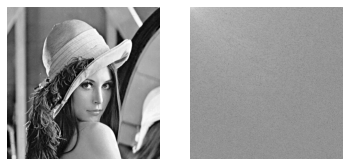

In [2]:
def DCT(image):
    img = cv2.imread(image,0)
    dct=cv2.dct(np.float32(img))
    dct=np.log(cv2.magnitude(dct,dct))
    plt.subplot(121),plt.imshow(img,cmap='gray'),plt.axis('off')
    plt.subplot(122),plt.imshow(dct,cmap='gray'),plt.axis('off')
    plt.show()
DCT('lenna_gray.bmp')

BlockDCT

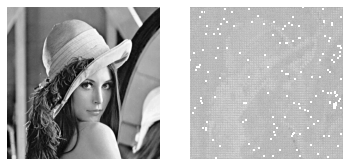

In [3]:
def BlockDCT(image):
    img = plt.imread(image,0)
    rows=img.shape[0]
    cols=img.shape[1]
    dct=np.zeros(img.shape)
    for i in range(0,rows,8):
        for j in range(0,cols,8):
            tmp=cv2.dct(np.float32(img[j:j+8,i:i+8]))
            dct[j:j+8,i:i+8]=cv2.magnitude(tmp,tmp)
    np.seterr(divide = 'ignore') 
    dct=np.log(cv2.normalize(dct,dct,0,65,cv2.NORM_MINMAX))
    np.seterr(divide = 'warn') 
    plt.subplot(121),plt.imshow(img,cmap='gray'),plt.axis('off')
    plt.subplot(122),plt.imshow(dct,cmap='gray'),plt.axis('off')
    plt.show()
BlockDCT('lenna_gray.bmp')

# < Image Enhancement >

1) backlight1 image

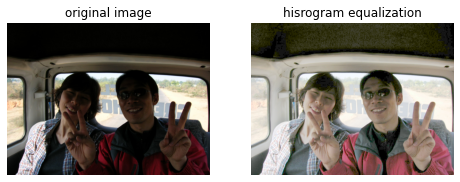

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = plt.imread('backlight1.bmp')
plt.figure(figsize=(8,8))
plt.subplot(121),plt.imshow(img),plt.axis('off')
plt.title("original image")

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img = cdf[img]
plt.subplot(122),plt.imshow(img),plt.axis('off')
plt.title("hisrogram equalization")

plt.show()
# plt.hist(img.flatten(),256,[0,256])
# plt.xlim([0,256])
# plt.show()

In [35]:
def Contrast_Stretch(image,a,b,va,vb):
    img = cv2.imread(image)
    height, width = img.shape[:2] 
    imgStretch = np.empty((width, height), np.uint8)
    for h in range(height):
        for w in range(width):
            if (a!=0 and img[h,w]<a):
                imgStretch[h,w]=(va/a)*img[h,w]
            elif (a==0 or a<=img[h,w] and img[h,w]<=b):
                imgStretch[h,w]=((vb-va)/(b-a))*(img[h,w]-a)+va
            elif img[h,w]>b:
                imgStretch[h,w]=((255-vb)/(255-b))*(img[h,w]-b)+vb
    cv2.normalize(imgStretch, imgStretch, norm_type=cv2.NORM_MINMAX)
    return imgStretch

cv2.imshow("contrast stretching",Contrast_Stretch("backlight1.bmp",0,50,0,100))
cv2.waitKey(0)
cv2.imshow("contrast stretching",Contrast_Stretch("backlight1.bmp",60,180,120,180))
cv2.waitKey(0)

ERROR! Session/line number was not unique in database. History logging moved to new session 392


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

2) backlight2 image

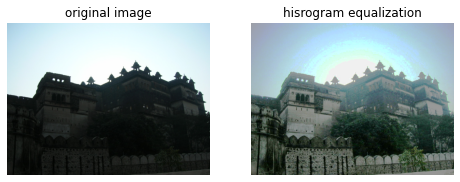

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = plt.imread('backlight2.bmp')
plt.figure(figsize=(8,8))
plt.subplot(121),plt.imshow(img),plt.axis('off')
plt.title("original image")

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img = cdf[img]
plt.subplot(122),plt.imshow(img),plt.axis('off')
plt.title("hisrogram equalization")

plt.show()
# plt.hist(img.flatten(),256,[0,256])
# plt.xlim([0,256])
# plt.show()

In [36]:
cv2.imshow("contrast stretching",Contrast_Stretch("backlight2.bmp",50,220,150,220))
cv2.waitKey(0)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

3) backlight3 image

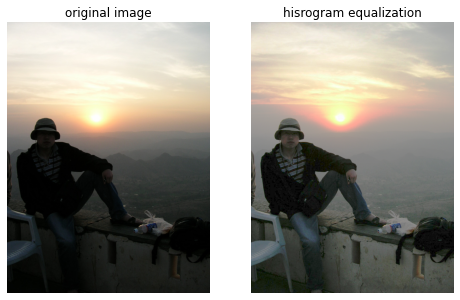

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = plt.imread('backlight3.bmp')
plt.figure(figsize=(8,8))
plt.subplot(121),plt.imshow(img),plt.axis('off')
plt.title("original image")

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img = cdf[img]
plt.subplot(122),plt.imshow(img),plt.axis('off')
plt.title("hisrogram equalization")

plt.show()
# plt.hist(img.flatten(),256,[0,256])
# plt.xlim([0,256])
# plt.show()

In [ ]:
cv2.imshow("contrast stretching",Contrast_Stretch("backlight2.bmp",50,200,100,200))
cv2.waitKey(0)
cv2.imshow("contrast stretching",Contrast_Stretch("backlight2.bmp",100,200,150,200))
cv2.waitKey(0)